# Universidad Mayor de San Andrés
##Facultad de Ciencias Puras y Naturales
###Carrera de Física
#### M.Sc. Decker Guzmán Zabalaga - Aplicaciones en Ciencias Atmósfericas usando Python
Clase 2



PANDAS: Pandas es un paquete Python que proporciona estructuras de datos rápidos, flexibles y expresivos, desenhadas para trabajar con datos "relacionales" o "nominados", fácil e intuitivo. Pandas é usado para diferentes tipos de dados, como: dados tabelados como SQL e Excel, séries temporais ordenadas ou não ordenadas, matrices com nomes nas colunas e linhas, qualquer tipo de dado que seja nomeado

STATSMODELS: Statsmodels es un paquete de Python con clases y funciones para una estimación de varios modelos estadísticos diferentes, pruebas de hipótesis y exploración de datos.

Antes de empezar a hablar de pandas, es importante entender qué es un diccionario. El diccionario es una estructura de datos que almacena estos datos en una composición de clave y valor. Por ejemplo:

In [2]:
my_dictionary = {'prec': 5, 'temp': 'twenty degrees celsius'}

my_dictionary['prec']
     

5

Es decir, seleccionamos la tecla 'prec' que tenía almacenado el valor 5. Como se ve arriba, el valor no tiene que ser un número, puede ser cualquier tipo de objeto: un flotante, un entero, una cadena, una función de python, una matriz, etc Este modo de referencia de formato clave/valor es extremadamente importante al usar pandas.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Para leer los datos, usamos el comando pd.read_csv, que se puede usar en cualquier tipo de archivo de texto, incluso aquellos que no terminan con la extensión .csv. Este comando deduce los nombres de columna de la primera línea, asigna un índice a cada línea y asume que el separador predeterminado es una coma. Comencemos con los datos de observación diarios de precipitación y temperatura de la Estación Meteorológica IAG (iag_cientec)

In [5]:
from google.colab import files 
  
uploaded = files.upload()

Saving iag_cientec.csv to iag_cientec.csv


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!cd /content/drive/lfa.csv

!pwd

/bin/bash: line 0: cd: /content/drive/lfa.csv: No such file or directory
/content


In [41]:
df = pd.read_csv('/content/drive/My Drive/lfa.csv')

df
   

,prec;temp;date
0,0.0;19.0;01 01/01/1933
1,0.0;18.9;02 01/01/1933
2,0.0;18.9;03 01/01/1933
3,0.0;18.9;04 01/01/1933
4,0.0;18.9;05 01/01/1933
...,...
745100,0.0;21.0;21 31/12/2017
745101,0.0;21.0;22 31/12/2017
745102,0.0;21.2;23 31/12/2017
745103,0.0;;00 01/01/2018


¡Recuerde que en python los índices comienzan con 0 (cero)!

In [42]:
df = pd.read_csv('/content/drive/My Drive/lfa.csv', sep=';')

df

,prec,temp,date
0,0.0,19.0,01 01/01/1933
1,0.0,18.9,02 01/01/1933
2,0.0,18.9,03 01/01/1933
3,0.0,18.9,04 01/01/1933
4,0.0,18.9,05 01/01/1933
...,...,...,...
745100,0.0,21.0,21 31/12/2017
745101,0.0,21.0,22 31/12/2017
745102,0.0,21.2,23 31/12/2017
745103,0.0,NaN,00 01/01/2018


Aunque ahora las columnas son correctas, vemos que la columna de fecha todavía no es un objeto de fecha y hora cuando observamos el tipo de cada columna

In [43]:
df.dtypes

prec    float64
temp    float64
date     object
dtype: object

De esta manera, convertiremos la columna en una fecha usando el pd.to_datetime que recibirá la columna 'date' y la transformaremos en una fecha y hora según el formato que especifiquemos.

In [44]:

df['date'] = pd.to_datetime(df['date'], format='%H %d/%m/%Y')

df
     


,prec,temp,date
0,0.0,19.0,1933-01-01 01:00:00
1,0.0,18.9,1933-01-01 02:00:00
2,0.0,18.9,1933-01-01 03:00:00
3,0.0,18.9,1933-01-01 04:00:00
4,0.0,18.9,1933-01-01 05:00:00
...,...,...,...
745100,0.0,21.0,2017-12-31 21:00:00
745101,0.0,21.0,2017-12-31 22:00:00
745102,0.0,21.2,2017-12-31 23:00:00
745103,0.0,NaN,2018-01-01 00:00:00


Esto lo podemos hacer incluso en el mismo read_csv, usando los argumentos parse_dates que recibe el nombre de las columnas que queremos y las transforma en una fecha y el argumento date_parser que es la función que hará esta conversión para cada punto. Hay formatos que los pandas ya entienden y que no necesitan el analizador de fecha, por ejemplo, si el formato fuera AAAA-mm-dd HH:MM:SS, entonces no necesitaríamos crear un analizador de fecha específico. Para obtener más opciones al leer archivos, consulte la documentación.

In [46]:
def date_parser(x):
  return pd.to_datetime(x, format='%H %d/%m/%Y')

# leer archivo con separador de punto y coma aplicando un formato de fecha específico
df = pd.read_csv('/content/drive/My Drive/lfa.csv', sep=';', parse_dates=['date'], date_parser=date_parser)

df.dtypes

prec           float64
temp           float64
date    datetime64[ns]
dtype: object

Como solo tenemos hasta el primer día de 2018, filtramos hasta 2017. Esto lo hacemos con el siguiente comando:

In [47]:
df = df[df['date'].dt.year <= 2017]  
# se lee como "y donde el año de la columna 'fecha' de df es menor o igual a 2017"

A menudo necesitamos convertir los valores proporcionados en series temporales con agregaciones más pequeñas, como mensuales, anuales o estacionales. El comando de resample es para esto, básicamente agrupa el marco de datos en subsecciones donde se puede aplicar un método, un promedio, una suma, etc.

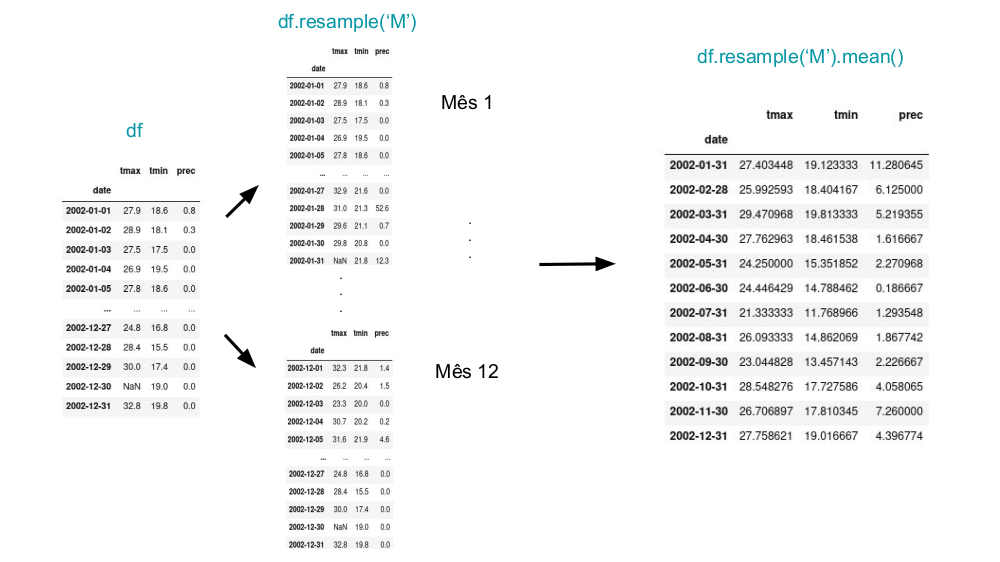

In [48]:
df.resample('A', on='date').mean() # Média anual

,prec,temp
date,,
1933-12-31,0.097020,16.890113
1934-12-31,0.122340,17.700274
1935-12-31,0.146427,17.595183
1936-12-31,0.128632,17.896767
1937-12-31,0.151176,17.333082
...,...,...
2013-12-31,0.171404,19.294521
2014-12-31,0.139612,20.067934
2015-12-31,0.208836,20.344658


In [49]:
df.resample('A', on='date').sum() # Suma anual
     

,prec,temp
date,,
1933-12-31,849.8,147940.5
1934-12-31,1071.7,155054.4
1935-12-31,1282.7,154133.8
1936-12-31,1129.9,157205.2
1937-12-31,1324.3,151837.8
...,...,...
2013-12-31,1501.5,169020.0
2014-12-31,1223.0,175795.1
2015-12-31,1829.4,178219.2


Si queremos aplicar un método (promedio o suma) a cada una de las diferentes variables, usamos un diccionario para especificar qué método aplicar.

In [50]:
df_annual = df.resample('A', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_annual

,prec,temp
date,,
1933-12-31,849.8,16.890113
1934-12-31,1071.7,17.700274
1935-12-31,1282.7,17.595183
1936-12-31,1129.9,17.896767
1937-12-31,1324.3,17.333082
...,...,...
2013-12-31,1501.5,19.294521
2014-12-31,1223.0,20.067934
2015-12-31,1829.4,20.344658


De manera similar podemos calcular lasmensuales

In [51]:
df_monthly = df.resample('M', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_monthly

,prec,temp
date,,
1933-01-31,110.9,20.123015
1933-02-28,84.3,21.030506
1933-03-31,125.9,19.007930
1933-04-30,20.5,17.010000
1933-05-31,48.8,15.547446
...,...,...
2017-08-31,75.8,16.333199
2017-09-30,45.5,19.780139
2017-10-31,124.6,20.360349


Calculemos ahora la climatología mensual, es decir, la media de los datos de cada uno de los doce meses del año. Para ello utilizaremos el método groupby que agrupa en subsecciones más pequeñas, así como el resample. Piense en groupby como una generalización de remuestreo que se puede usar para cualquier tipo de agrupador, no solo para fechas.

In [52]:
def print_data(x):
  print(x)

df_baseline = df_monthly['1961-01-01':'1990-12-31']

df_baseline.groupby(df_baseline.index.month).apply(print_data)
     

             prec       temp
date                        
1961-01-31  181.5  21.402151
1962-01-31  162.9  20.180376
1963-01-31  228.4  22.184543
1964-01-31   71.2  20.330108
1965-01-31  387.9  19.644220
1966-01-31  234.4  21.962097
1967-01-31  215.7  20.719624
1968-01-31  258.1  20.769220
1969-01-31  109.6  22.364382
1970-01-31  268.8  20.756855
1971-01-31  194.2  22.893683
1972-01-31  245.8  21.698925
1973-01-31  191.4  22.923656
1974-01-31  236.5  21.535753
1975-01-31  116.8  20.956183
1976-01-31  296.9  22.319758
1977-01-31  363.4  21.877823
1978-01-31  104.8  22.235753
1979-01-31   79.1  19.196102
1980-01-31  236.1  20.697446
1981-01-31  199.3  21.769624
1982-01-31  226.0  19.774866
1983-01-31  212.7  22.233199
1984-01-31  257.9  23.533333
1985-01-31  162.0  20.245027
1986-01-31  214.9  22.947177
1987-01-31  301.0  22.944489
1988-01-31  228.1  23.375672
1989-01-31  424.9  21.905780
1990-01-31  288.8  23.044892
             prec       temp
date                        
1961-02-28  29

""


La climatología mensual se calcula, son, aplicando la media del grupo de meses

In [53]:
df_clim = df_baseline.groupby(df_baseline.index.month).mean()

df_clim

,prec,temp
date,,
1,223.303333,21.614091
2,222.096667,21.954305
3,158.993333,21.202711
4,90.996667,19.183708
5,75.673333,17.072890
6,57.923333,15.737574
7,47.583333,15.285582
8,40.490000,16.436039
9,74.720000,17.178282


Para calcular la anomalía mensual, comencemos a hacerlo de forma más manual, iterando sobre cada uno de los meses con un for:

In [55]:
df_anomaly = []
for month in range(1,13):  # el for siempre va hasta  n-1, o sea, 1, 2, 3, ..., 11, 12
  # Filtra cada un de los doce meses
  df_subset = df_monthly[df_monthly.index.month == month]
  
  # Calcula la anomalia mensual para remover o ciclo estacional
  anomaly = df_subset - df_clim.loc[month]

  df_anomaly.append(anomaly)

df_anomaly = pd.concat(df_anomaly)

df_anomaly

,prec,temp
date,,
1933-01-31,-112.403333,-1.491076
1934-01-31,-2.503333,-0.960596
1935-01-31,-96.503333,-1.476859
1936-01-31,-103.103333,-0.245542
1937-01-31,-43.903333,-2.632370
...,...,...
2013-12-31,-112.360000,1.661290
2014-12-31,34.940000,1.787903
2015-12-31,-11.660000,2.302285


Consejo: ¡Las reseñas son importantes, muy importantes! Pero deben usarse sabiamente. Sus comentarios son una representación de nuestra incapacidad para representar claramente lo que queremos hacer con el código, por lo tanto, cada vez que agregue un comentario, asegúrese de que no sea obvio, pero que brinde información sobre el propósito del código. Por ejemplo, si tenemos la variable mensual y la variable clima, la resta de mensual - clima puede ir acompañada del comentario: "Calcula la anomalía mensual para quitar el ciclo estacional" en lugar de "Calcula mensual menos la climatología".

Una forma más sencilla y directa sería utilizando la función lambda y groupby. Agrupamos por mes y hacemos la diferencia con respecto a la media del periodo

In [56]:
df_anomaly = df_monthly.groupby(df_monthly.index.month).apply(lambda x: x - x['1961-01-01':'1990-12-31'].mean())

df_anomaly

,prec,temp
date,,
1933-01-31,-112.403333,-1.491076
1933-02-28,-137.796667,-0.923799
1933-03-31,-33.093333,-2.194780
1933-04-30,-70.496667,-2.173708
1933-05-31,-26.873333,-1.525444
...,...,...
2017-08-31,35.310000,-0.102841
2017-09-30,-29.220000,2.601856
2017-10-31,-4.536667,2.039713


Recordando que esto es análogo si primero definimos una función y luego la aplicamos con apply, es decir

def calculate_anomaly(x):
    return x - x['1961-01-01':'1990-12-31'].mean()

df_anomaly = df_monthly.groupby(df_monthly.index.month).apply(calculate_anomaly)

El cálculo de los promedios estacionales se realiza mediante el agrupador 'Q', que realizará la agregación cada 3 meses. Sin embargo, tenga en cuenta que la división se realiza entre los meses 01-03, 04-06, 07-09, 10-12.

In [57]:
df.resample('Q', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})


,prec,temp
date,,
1933-03-31,321.1,20.021214
1933-06-30,138.6,15.282326
1933-09-30,133.4,14.835960
1933-12-31,256.7,17.472962
1934-03-31,441.0,20.691204
...,...,...
2016-12-31,407.6,20.559149
2017-03-31,665.1,22.693472
2017-06-30,425.4,18.248581


Para resolver esto, agregamos la cadena '-NOV' en el tipo de remuestreo, por lo que es 'Q-NOV' en lugar de 'Q'. Esto indica que la agregación se hará considerando que el año termina en noviembre y por lo tanto inicia en diciembre. De esta forma tenemos, 12-02, 03-05, 06-08, 09-11 que son DJF, MAM, JJA, SON, respectivamente.

In [58]:
df_seasonal = df.resample('Q-NOV', on='date').agg({'prec': pd.Series.sum, 'temp': pd.Series.mean})

df_seasonal

,prec,temp
date,,
1933-02-28,195.2,20.553993
1933-05-31,195.2,17.190399
1933-08-31,118.7,13.880344
1933-11-30,225.9,16.713874
1934-02-28,495.9,20.053750
...,...,...
2017-02-28,661.4,22.882222
2017-05-31,464.8,19.877536
2017-08-31,180.0,16.212138


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

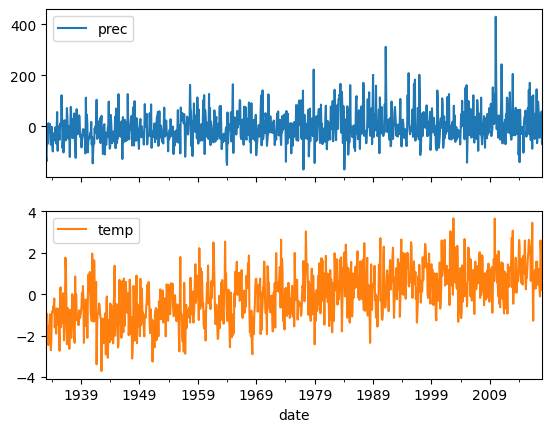

In [59]:
df_anomaly.plot(subplots=True)

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

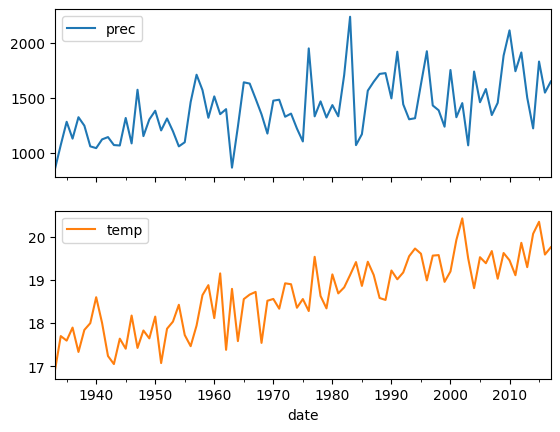

In [60]:
df_annual.plot(subplots=True)


Con base en datos anuales, podemos ver que hay una tendencia en las variables de temperatura y precipitación. Para encontrar el valor de esta tendencia, usamos el paquete statsmodels, sin embargo, puede usar el que le resulte más cómodo. Hay implementaciones de regresión lineal en paquetes como sklearn y numpy.

In [61]:
import statsmodels.api as sm

# adiciona coluna de 1s para um ajuste do tipo y = a * x + b * 1
X = sm.add_constant(df_annual.index.year)
y = df_annual['temp']

# ajusta o modelo usando mínimos quadrados (ordinary least squares)
reg = sm.OLS(y, X).fit()

reg.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           8.81e-26
Time:                        15:28:05   Log-Likelihood:                -47.843
No. Observations:                  85   AIC:                             99.69
Df Residuals:                      83   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.5672      3.754    -10.274      0.000     -46.033     -31.101
x1             0.0290      0.002     15.244      0.000       0.025       0.033
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.427
Skew:                           0.006   Prob(JB):                        0.808
Kurtosis:                       2.653   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El atributo params proporciona una Serie pandas en este caso con el valor de los parámetros estimados.

In [62]:
reg.params  # const = coeficiente linear e x1 = coeficiente angular


const   -38.567171
x1        0.028972
dtype: float64

También podemos obtener el intervalo de confianza de los parámetros de regresión basados ​​en la distribución t

In [63]:
reg.conf_int() # limiar inferior e superior do intervalo de confiança de 95 %


,0,1
const,-46.033353,-31.100990
x1,0.025192,0.032752


el residuo

In [64]:
reg.resid


date
1933-12-31   -0.546268
1934-12-31    0.234920
1935-12-31    0.100856
1936-12-31    0.373468
1937-12-31   -0.219189
                ...   
2013-12-31   -0.459649
2014-12-31    0.284792
2015-12-31    0.532543
2016-12-31   -0.254440
2017-12-31   -0.114648
Freq: A-DEC, Length: 85, dtype: float64

los valores de ajuste para cada uno de los puntos

In [65]:
reg.fittedvalues


date
1933-12-31    17.436381
1934-12-31    17.465354
1935-12-31    17.494326
1936-12-31    17.523299
1937-12-31    17.552271
                ...    
2013-12-31    19.754169
2014-12-31    19.783142
2015-12-31    19.812114
2016-12-31    19.841087
2017-12-31    19.870059
Freq: A-DEC, Length: 85, dtype: float64

vamos entonces a realizar una figura con ajuste y el residuo

<Axes: xlabel='date'>

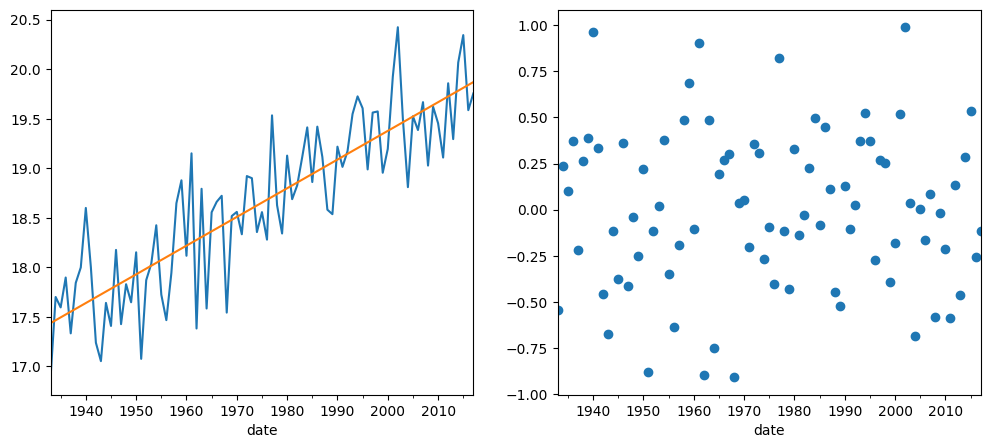

In [66]:
import matplotlib.pyplot as plt

# Figura creada de forma análoga a:
# fig = plt.figure(figisize=(12,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5)) 

df_annual['temp'].plot(ax=ax1)
reg.fittedvalues.plot(ax=ax1)

reg.resid.plot(ax=ax2, marker='o', ls='')

para la precipitacion

In [67]:
X = sm.add_constant(df_annual.index.year)
y = df_annual['prec']

reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prec   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     35.82
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           5.30e-08
Time:                        15:32:26   Log-Likelihood:                -582.83
No. Observations:                  85   AIC:                             1170.
Df Residuals:                      83   BIC:                             1175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.075e+04   2031.868     -5.289      0.000   -1.48e+04   -6705.467
x1             6.1569      1.029      5.985      0.000       4.111       8.203
==============================================================================
Omnibus:                        5.450   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.750
Skew:                           0.480   Prob(JB):                       0.0930
Kurtosis:                       3.648   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='date'>

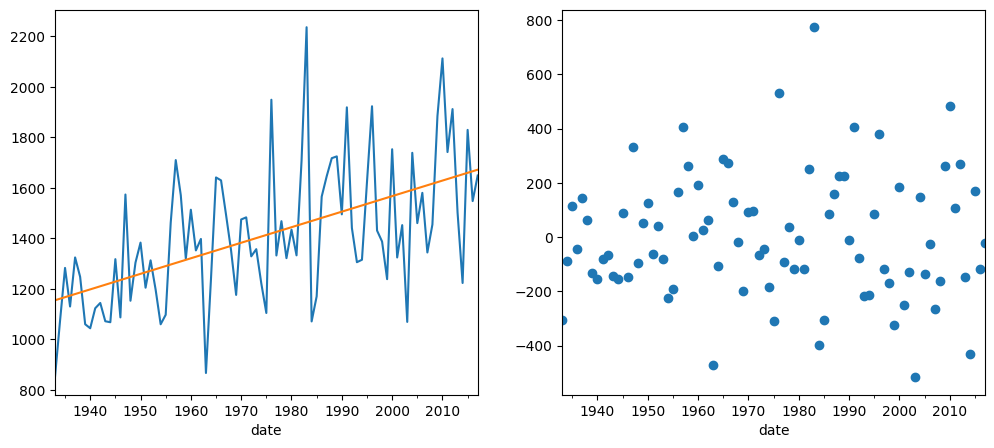

In [68]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5))

df_annual['prec'].plot(ax=ax1)
reg.fittedvalues.plot(ax=ax1)

reg.resid.plot(ax=ax2, marker='o', ls='')

Ahora mostraremos cómo interpolar los datos de las estaciones que faltan. En este caso, utilizaremos las temperaturas mínimas registradas diariamente por las estaciones meterologicas. Es importante verificar primero cuántos valores faltantes hay, reemplazando cualquier tipo de indicador de datos faltantes con NaN:

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df_fallas = pd.read_csv('/content/drive/My Drive/Tmin_C.csv',parse_dates=True,index_col=0, na_values=-9999)

df_fallas
 #  df_falhas = pd.read_csv('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/Tmin_C_falhas.csv', parse_dates=True, index_col=0, na_values=-9999)


,cge_p1000852,cge_p1000850,cge_p1000857,cge_p1000854,cge_p524,cge_p1000866,cge_p1000840,cge_p1000860,cge_p507,cge_p1000864,...,cge_p1000862,cge_p1000842,cge_p1000848,cge_p504,cge_p515,cge_p509,cge_p540,cge_p510,cge_p1000859,iag_cientec
index,,,,,,,,,,,,,,,,,,,,,
2013-01-01,21.628167,21.171667,19.828667,21.141500,NaN,NaN,21.817833,22.581500,19.820500,NaN,...,21.152833,20.699667,21.505500,19.516667,NaN,21.020500,NaN,21.943833,21.772667,21.5
2013-01-02,17.248833,NaN,16.530333,17.158167,NaN,NaN,17.166667,18.119833,15.937833,NaN,...,17.753833,17.591333,18.150167,18.249167,NaN,17.171500,NaN,18.017667,17.435167,17.4
2013-01-03,17.297500,17.725333,16.604500,17.425000,NaN,NaN,17.175000,18.074667,16.067000,NaN,...,17.228667,17.730500,18.291167,17.782667,NaN,17.359500,NaN,18.084500,17.332667,17.6
2013-01-04,18.289500,18.618500,17.737333,18.608167,NaN,NaN,18.192000,19.155667,17.126333,NaN,...,18.573333,18.932167,19.269667,18.124833,NaN,18.309500,NaN,19.033000,18.494167,18.7
2013-01-05,20.332333,20.240000,19.204167,20.673333,NaN,NaN,20.132500,20.805833,18.826833,NaN,...,19.926000,20.399500,20.933167,19.075000,NaN,19.501333,NaN,20.604167,19.892500,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,21.072500,20.463000,18.782833,21.354333,21.102833,21.211833,21.720333,21.280667,19.635833,20.167833,...,19.968000,19.771833,20.911333,20.033500,20.391000,20.944833,20.280167,21.586333,20.730000,21.0
2015-12-28,20.209833,20.003167,20.042000,20.723333,20.414667,20.938333,20.832500,21.188333,19.788333,20.614333,...,20.332500,19.993333,20.580667,19.718000,20.156000,20.612500,20.240000,21.168333,20.265333,20.8
2015-12-29,20.354167,20.038667,19.953167,20.577333,19.577000,20.169500,20.332000,20.379333,19.672500,20.040000,...,20.005000,19.486167,20.275333,19.377333,15.454800,19.765000,19.575333,20.461333,20.048667,20.3


El numero de datos faltantes de cada estacion esta dada por:

In [77]:
df_fallas.isnull().sum()



index           0
cge_p1000852    0
cge_p1000850    0
cge_p1000857    0
cge_p1000854    0
cge_p524        0
cge_p1000866    0
cge_p1000840    0
cge_p1000860    0
cge_p507        0
cge_p1000864    0
cge_p1000844    0
cge_p1000862    0
cge_p1000842    0
cge_p1000848    0
cge_p504        0
cge_p515        0
cge_p509        0
cge_p540        0
cge_p510        0
cge_p1000859    0
iag_cientec     0
dtype: int64